# Segmentacion de clientes

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('Mall_Customers.csv')


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Preprocesamiento

In [13]:
df['Gender'] = df['Gender'].replace('Male',1).replace('Female',0)

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [16]:
df = df.drop('CustomerID', axis = 1)

In [19]:
import numpy as np
df = df.astype(np.float64)
df = df.fillna(method ='ffill') 

In [22]:
from sklearn.preprocessing import StandardScaler,normalize
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=df.columns) 

In [23]:
from sklearn.cluster import KMeans

In [24]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['Annual Income (k$)', 'Spending Score (1-100)'] 
X_principal.head()

,Annual Income (k$),Spending Score (1-100)
0,0.224007,0.409408
1,0.093617,0.680596
2,-0.305531,-0.190610
3,-0.597715,0.329012
4,-0.470396,-0.194969


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

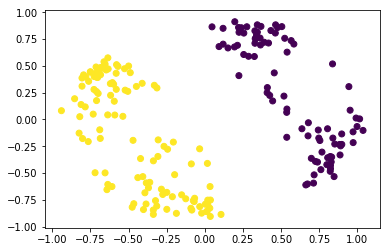

In [30]:
plt.scatter(X_principal['Annual Income (k$)'], X_principal['Spending Score (1-100)'], c = km.predict(normalized_df));

## Optimizando

In [33]:
Sum_of_squared_distances = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_df)
    Sum_of_squared_distances.append(km.inertia_)

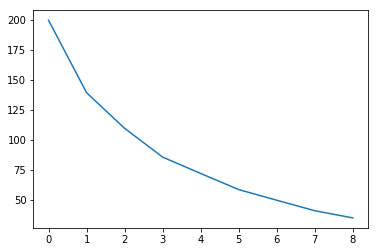

In [34]:
plt.plot(Sum_of_squared_distances);

Utilizando las columnas “Spending Score” y “Annual Income”, se realiza un agrupamiento de datos con el algoritmo “K-Means” con K = 3. Nota: En caso de ser necesario.

In [35]:
n_clusters = 3
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['Annual Income (k$)', 'Spending Score (1-100)'] 
X_principal.head()

,Annual Income (k$),Spending Score (1-100)
0,0.224007,0.409408
1,0.093617,0.680596
2,-0.305531,-0.190610
3,-0.597715,0.329012
4,-0.470396,-0.194969


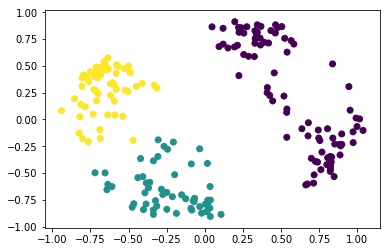

In [38]:
plt.scatter(X_principal['Annual Income (k$)'], X_principal['Spending Score (1-100)'], c = km.predict(normalized_df));

## Identificando y describiendo el perfil de los clientes por cluster

In [39]:
df["c"] = km.predict(normalized_df)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),c
0,1.0,19.0,15.0,39.0,0
1,1.0,21.0,15.0,81.0,0
2,0.0,20.0,16.0,6.0,1
3,0.0,23.0,16.0,77.0,2
4,0.0,31.0,17.0,40.0,2


In [40]:
import seaborn as sns

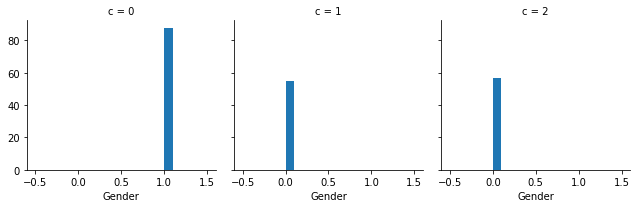

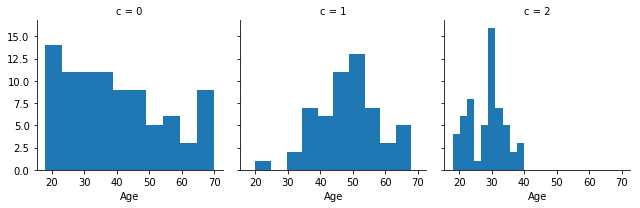

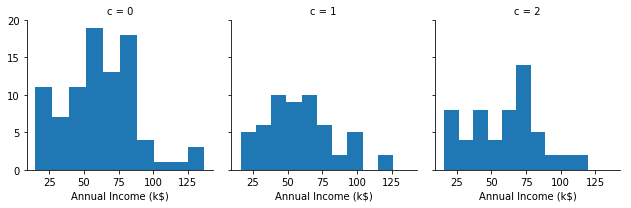

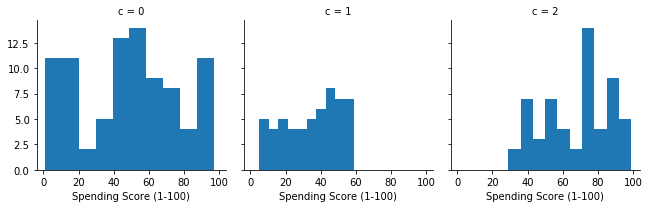

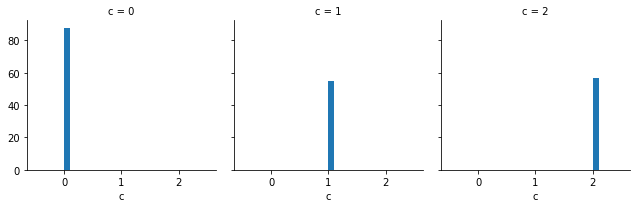

In [41]:
for col in df:
    grid= sns.FacetGrid(df, col='c')
    grid.map(plt.hist, col)

c0: Las personas mantienen un equilibrio entre gastos e ingresos, por lo que no ahorran.

c1: Hay una disminucion en los gastos, dejando un margen de ingresos mayor.

c2: Se va la concentracion a los gastos, disminuyendo los ingresos.